In [1]:
import numpy as np
from scipy.io import loadmat, savemat
from scipy.signal import find_peaks
import os
import matplotlib.pyplot as plt
from matplotlib import interactive
import json

datajson_save_dir = os.path.join(os.getcwd(), 'data.json')
with open(datajson_save_dir, 'r') as f:
    loaded_data = json.load(f)
    loaded_data_ultrasonic = loaded_data['ultrasound']
    loaded_data_signal = loaded_data['sig']

    

%matplotlib inline

interactive(True)
index = len(loaded_data_ultrasonic) -1 # get the latest recording

# datamat_save_dir = os.path.join(os.getcwd(), 'data.mat')
# cwd_path = os.getcwd()
# loaded_data = loadmat(datamat_save_dir)
# loaded_data_ultrasonic = loaded_data['ultrasound']
# loaded_data_signal = loaded_data['sig']

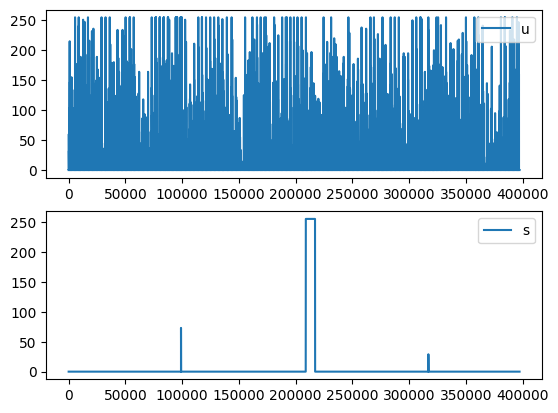

In [2]:
fig, axes  = plt.subplots(nrows= 2, ncols=1)
axes[0].plot(loaded_data_ultrasonic[index])
axes[0].legend('ultrasonic')
axes[1].plot(loaded_data_signal[index])
axes[1].legend('signal')

In [21]:
signal_1 = loaded_data_signal[index]
ultra_1 = loaded_data_ultrasonic[index]
signal_2 = loaded_data_signal[index - 1]
ultra_2 = loaded_data_ultrasonic[index - 1]
signal_3 = loaded_data_signal[index - 2]
ultra_3 = loaded_data_ultrasonic[index - 2]

In [28]:
myarray = np.array(ultra_3)

In [29]:
myarray.shape

(397312,)

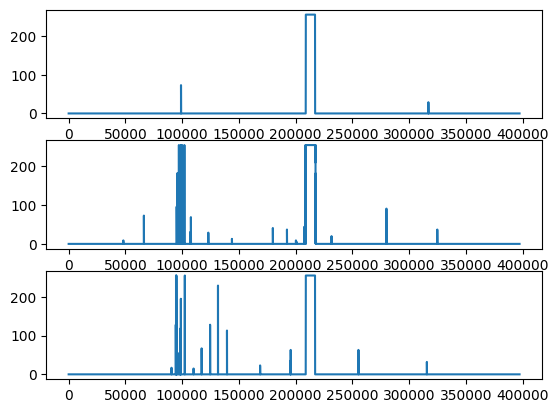

In [19]:
fig, axes  = plt.subplots(nrows= 3, ncols=1)
axes[0].plot(signal_1)
axes[1].plot(signal_2)
axes[2].plot(signal_3)

In [3]:

# is_255 = loaded_data_signal[index] == 255
# runs = np.diff(np.where(np.concatenate(([0], is_255, [0])))[0])
# starts = np.where(np.diff(np.concatenate(([0], is_255, [0])) == 1))[0]

In [4]:
threshold = 0.8
peaks, _ = find_peaks(loaded_data_signal[index], height=threshold)
np.diff(peaks) < 20

array([False, False])

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

# Generate example signals with overlapping repetitive patterns
t = np.linspace(0, 10, 397312)
# signal1 = np.sin(2 * np.pi * 1 * t) + 0.2 * np.random.randn(len(t))
# signal2 = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 0.5 * t) + 0.2 * np.random.randn(len(t))
# signal3 = np.sin(2 * np.pi * 1 * t + np.pi/4) + 0.2 * np.random.randn(len(t))
signal1 = np.array(ultra_1)
signal2 = np.array(ultra_2)
signal3 = np.array(ultra_3)
signals = [signal1, signal2, signal3]

In [39]:
signal1.shape

(397312,)

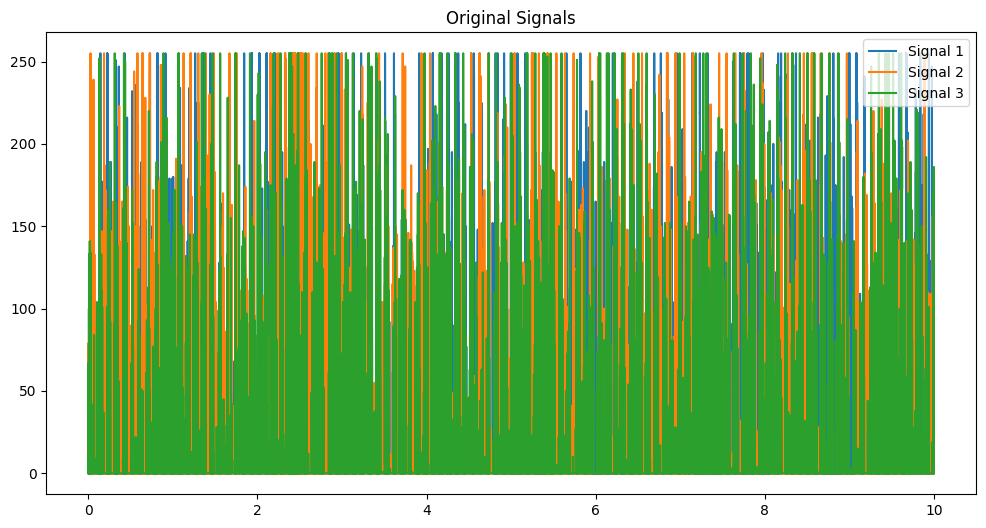

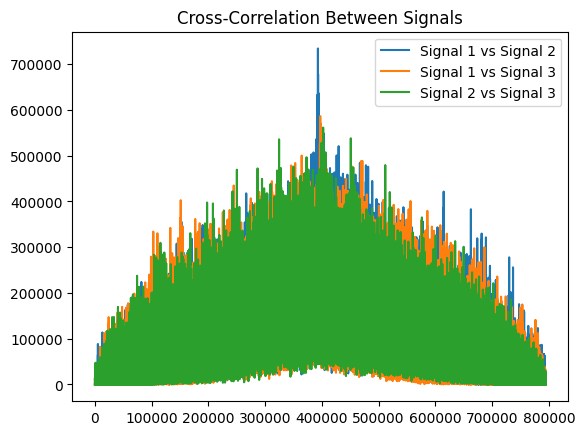

Detected lags (repetition patterns): [np.int64(-4278), np.int64(-176), np.int64(4958)]


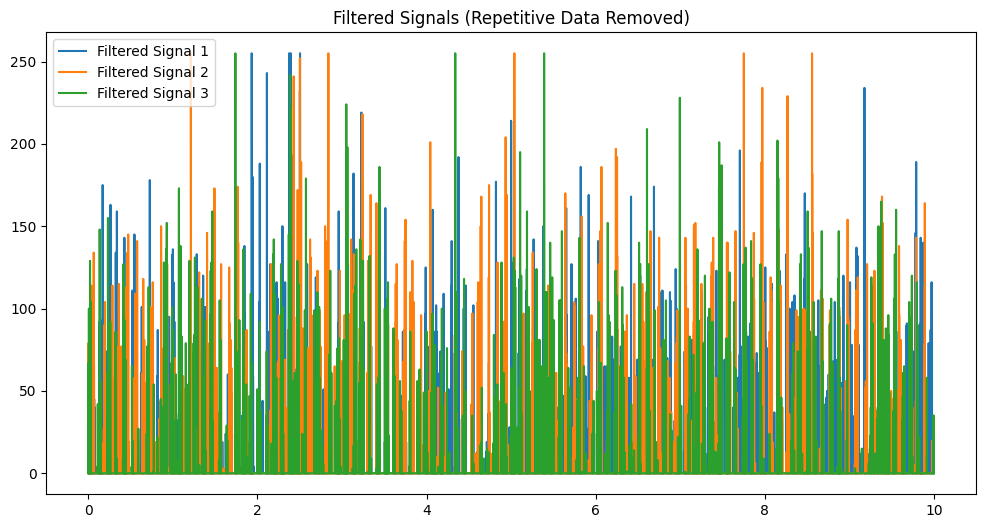

In [40]:
# Plot original signals
plt.figure(figsize=(12, 6))
for i, sig in enumerate(signals):
    plt.plot(t, sig, label=f'Signal {i+1}')
plt.title('Original Signals')
plt.legend()
plt.show()

# Cross-correlation function
def compute_cross_correlation(signals):
    lags = []
    for i in range(len(signals)):
        for j in range(i + 1, len(signals)):
            corr = correlate(signals[i], signals[j], mode='full')
            lag = np.argmax(corr) - len(signals[i]) + 1
            lags.append(lag)
            # Plot the cross-correlation
            plt.plot(corr, label=f'Signal {i+1} vs Signal {j+1}')
    plt.title("Cross-Correlation Between Signals")
    plt.legend()
    plt.show()
    return lags

# Detect repetitions
lags = compute_cross_correlation(signals)
print("Detected lags (repetition patterns):", lags)

# Filter out repetitive data based on lags
def filter_repetitions(signal, lag_threshold):
    peaks, _ = find_peaks(signal, distance=lag_threshold)
    for peak in peaks:
        signal[peak - lag_threshold//2:peak + lag_threshold//2] = 0
    return signal

filtered_signals = [filter_repetitions(sig.copy(), lag_threshold=200) for sig in signals]

# Plot filtered signals
plt.figure(figsize=(12, 6))
for i, sig in enumerate(filtered_signals):
    plt.plot(t, sig, label=f'Filtered Signal {i+1}')
plt.title('Filtered Signals (Repetitive Data Removed)')
plt.legend()
plt.show()

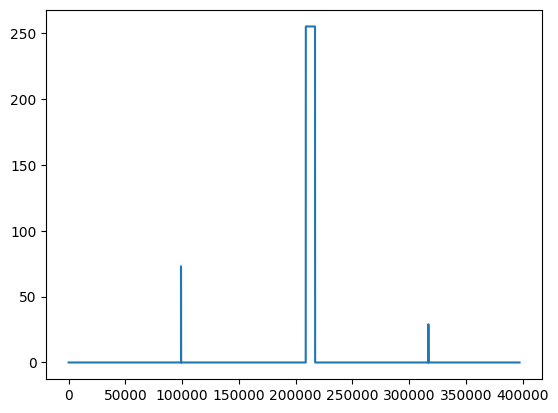

In [41]:
plt.plot(signal_1)